---
## **Note**

This experiment does not work properly yet

---

In [1]:
from multiple_inputs import *
import numpy as np
import common as c
import matplotlib.pyplot as plt

# Simple recurrent network, multiple hidden nodes and multiple inputs

The model is trained to predict value $x^t$ on the basis of all previous timepoints $x^{0\dots t-1}$. The data is a sine-like sequence. The input is multi-dimensional, and each feature is the to-predict data with a time lag. For instance:
$$
x^t_1 = y^{t-1} \\
x^t_2 = y^{t-2} \\
\vdots \\
x^t_J = y^{t-J}
$$

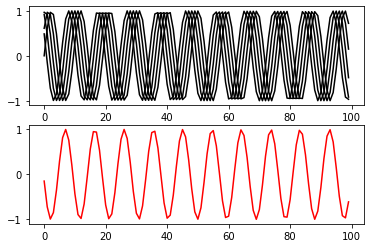

In [2]:
numJ = 5
numT = 100

data = np.sin(np.arange(0, numT+numJ)*(2*np.pi*11)/(numT+numJ))
x = np.zeros((numT, numJ))

y = data[numJ:]
for ij in range(0, numJ):
    x[:, ij] = data[ij:-(numJ-ij)]

plt.figure()
plt.subplot(2, 1, 1); plt.plot(x, color='black')
plt.subplot(2, 1, 2); plt.plot(y, color='red')

## Create network

In [3]:
numK = 5

cfg = c.Cfg()
cfg.numJ = numJ
cfg.numK = numK
cfg.numT = numT

network = Network(cfg)

## Training

In [4]:
numN = 2500

In [5]:
exp = Experiment(network)

cfg = c.Cfg()
cfg.numN = numN
cfg.alpha = 0.3
cfg.feedback_epoch = 250

log = exp.run(cfg, x, y)

Finished 0/2500
Finished 250/2500
Finished 500/2500
Finished 750/2500
Finished 1000/2500
Finished 1250/2500
Finished 1500/2500
Finished 1750/2500
Finished 2000/2500
Finished 2250/2500


## Mean squared error

Text(0, 0.5, 'log MSE')

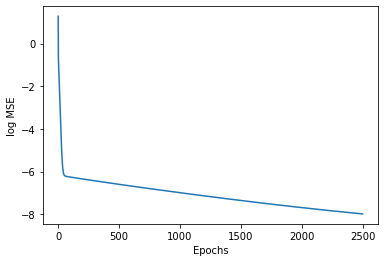

In [6]:
mse = [t.update.mse for t in log.trials]

plt.figure()
plt.plot(np.log(mse))
plt.xlabel("Epochs")
plt.ylabel("log MSE")

## Predicted data $\hat{y}$ and training data $x$ over time
From the final epoch

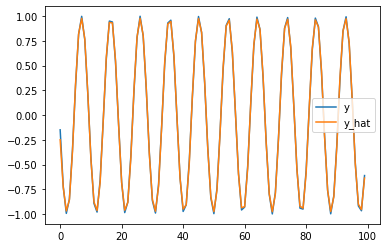

In [7]:
y_hat = log.trials[-1].forward.y_hat

plt.figure()
plt.plot(y)
plt.plot(y_hat)
plt.legend(['y','y_hat'])

## Evolution of parameters

Text(0.5, 0, 'Epochs')

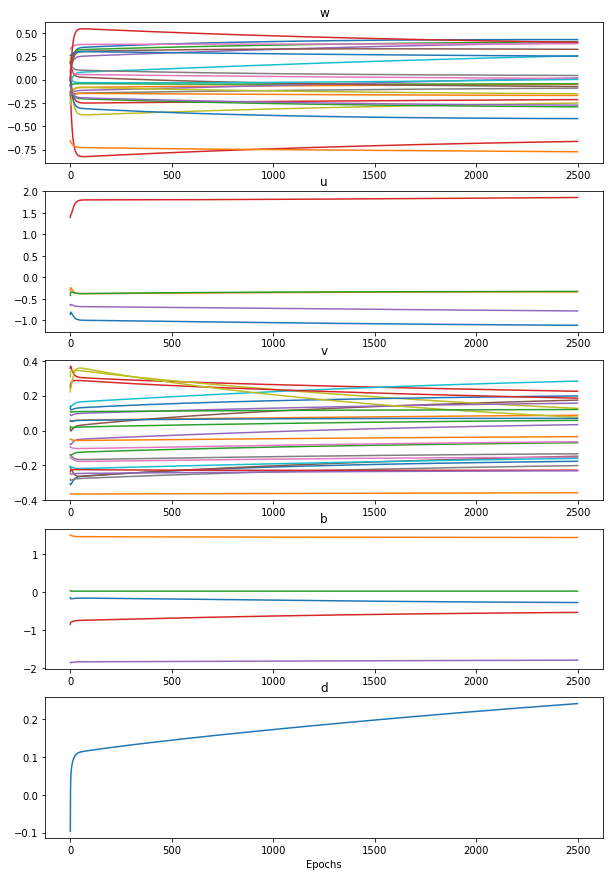

In [8]:
w = np.array([t.update.w for t in log.trials])
v = np.array([t.update.v for t in log.trials])
u = np.array([t.update.u for t in log.trials])
b = np.array([t.update.b for t in log.trials])
d = np.array([t.update.d for t in log.trials])

plt.figure(figsize=(10, 15))
plt.subplot(5, 1, 1); plt.plot(w.reshape((numN, -1))); plt.title("w");
plt.subplot(5, 1, 2); plt.plot(u.reshape((numN, -1))); plt.title("u");
plt.subplot(5, 1, 3); plt.plot(v.reshape((numN, -1))); plt.title("v");
plt.subplot(5, 1, 4); plt.plot(b.reshape((numN, -1))); plt.title("b");
plt.subplot(5, 1, 5); plt.plot(d.reshape((numN, -1))); plt.title("d");
plt.xlabel("Epochs")


# Validation

To validate the training of the model, we'll also train a model in which the recurrent weights $v$ are fixed to 0.

In [9]:
cfg = c.Cfg()
cfg.numJ = numJ
cfg.numK = numK
cfg.numT = numT
cfg.v0 = np.zeros((cfg.numK, cfg.numK))
cfg.fix_v = True

network = Network(cfg)

exp = Experiment(network)

cfg = c.Cfg()
cfg.numN = numN
cfg.alpha = 0.3
cfg.feedback_epoch = 250

log_null = exp.run(cfg, x, y)

Finished 0/2500
Finished 250/2500
Finished 500/2500
Finished 750/2500
Finished 1000/2500
Finished 1250/2500
Finished 1500/2500
Finished 1750/2500
Finished 2000/2500
Finished 2250/2500


## Mean squared error

The full model with recurrent weights is better able to predict the data than the null-model without recurrent weight:

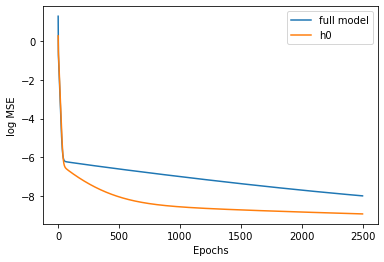

In [10]:
mse_null = [t.update.mse for t in log_null.trials]

plt.figure()
plt.plot(np.log(mse))
plt.plot(np.log(mse_null))
plt.xlabel("Epochs")
plt.ylabel("log MSE")
plt.legend(['full model', 'h0'])

The improvement of the full model is only marginal over the null model. To verify, the recurrent parameters were indeed fixed to 0:_null

Text(0.5, 0, 'Epochs')

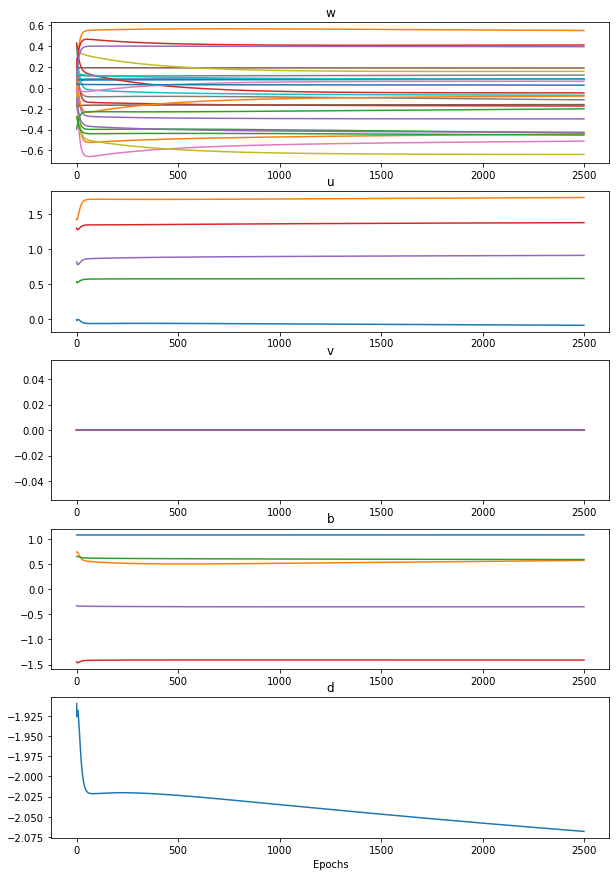

In [11]:
w = np.array([t.update.w for t in log_null.trials])
v = np.array([t.update.v for t in log_null.trials])
u = np.array([t.update.u for t in log_null.trials])
b = np.array([t.update.b for t in log_null.trials])
d = np.array([t.update.d for t in log_null.trials])

plt.figure(figsize=(10, 15))
plt.subplot(5, 1, 1); plt.plot(w.reshape((numN, -1))); plt.title("w");
plt.subplot(5, 1, 2); plt.plot(u.reshape((numN, -1))); plt.title("u");
plt.subplot(5, 1, 3); plt.plot(v.reshape((numN, -1))); plt.title("v");
plt.subplot(5, 1, 4); plt.plot(b.reshape((numN, -1))); plt.title("b");
plt.subplot(5, 1, 5); plt.plot(d.reshape((numN, -1))); plt.title("d");
plt.xlabel("Epochs")


## Comparison to multiple hidden nodes script

In [12]:
from multiple_hidden_nodes import experiment as exp2

If the multiple inputs model is implemented correctly, then running it with `numJ = 1` should give the same result as the model from multiple_hidden_nodes. They are initialized with the same initial parameters.

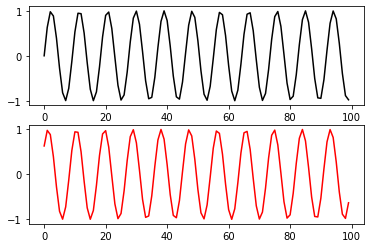

In [13]:
# Regenerate data
numJ = 1
numT = 100

data = np.sin(np.arange(0, numT+numJ)*(2*np.pi*11)/(numT+numJ))
x = np.zeros((numT, numJ))

y = data[numJ:]
for ij in range(0, numJ):
    x[:, ij] = data[ij:-(numJ-ij)]

plt.figure()
plt.subplot(2, 1, 1); plt.plot(x, color='black')
plt.subplot(2, 1, 2); plt.plot(y, color='red')

In [14]:
numK = 5

w0 = np.random.randn(numK)
b0 = np.random.randn(numK)
v0 = np.random.randn(numK, numK) / numK
u0 = np.random.randn(numK)
d0 = np.random.randn(1)

In [15]:
# Model 1 - multiple hidden nodes
cfg = c.Cfg()
cfg.numT = numT
cfg.numN = numN
cfg.numK = numK
cfg.w0 = np.copy(w0)
cfg.b0 = np.copy(b0)
cfg.v0 = np.copy(v0)
cfg.u0 = np.copy(u0)
cfg.d0 = np.copy(d0)
cfg.alpha = 0.3
cfg.feedback_epoch = 250

log1 = exp2.run(cfg, x, y)   

Finished 0/2500
Finished 250/2500
Finished 500/2500
Finished 750/2500
Finished 1000/2500
Finished 1250/2500
Finished 1500/2500
Finished 1750/2500
Finished 2000/2500
Finished 2250/2500


In [16]:
# Model 3 - multiple inputs, numJ = 1
cfg = c.Cfg()
cfg.numJ = 1
cfg.numK = numK
cfg.numT = numT
cfg.w0 = np.copy(w0)[None, :]
cfg.b0 = np.copy(b0)
cfg.v0 = np.copy(v0)
cfg.u0 = np.copy(u0)
cfg.d0 = np.copy(d0)

network = Network(cfg)

exp = Experiment(network)

cfg = c.Cfg()
cfg.numN = numN
cfg.alpha = 0.3
cfg.feedback_epoch = 250

log2 = exp.run(cfg, x, y)

Finished 0/2500
Finished 250/2500
Finished 500/2500
Finished 750/2500
Finished 1000/2500
Finished 1250/2500
Finished 1500/2500
Finished 1750/2500
Finished 2000/2500
Finished 2250/2500


## Mean squared error

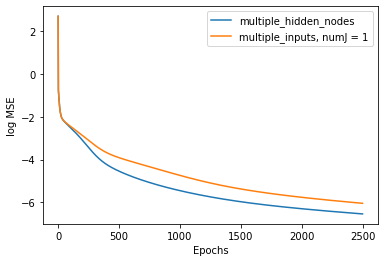

In [17]:
mse2 = [t.update.mse for t in log2.trials]

plt.figure()
plt.plot(np.log(log1.mse))
plt.plot(np.log(mse2))
plt.xlabel("Epochs")
plt.ylabel("log MSE")
plt.legend(['multiple_hidden_nodes', 'multiple_inputs, numJ = 1'])

## Final parameters

Multiple hidden nodes model:

In [18]:
print(f'w: {log1.w[numN-1]}')
print(f'b: {log1.b[numN-1]}')
print(f'v: {log1.v[numN-1]}')
print(f'u: {log1.u[numN-1]}')
print(f'd: {log1.d[numN-1]}')

w: [1.36901451 1.973891   1.03188445 0.246369   1.72480687]
b: [ 1.02659122  0.32647308 -0.63730364  0.29259709 -0.05303031]
v: [[ 0.18922537 -0.29288271 -0.06001672 -0.01820798  0.05398114]
 [-1.35594276  0.09401229 -0.09670133 -0.68504963 -0.03535379]
 [-0.28913332 -0.16132667 -0.18622558 -0.19265544  0.22105707]
 [ 0.78000208 -0.61681131  0.32363083  0.36132047  0.44403961]
 [-1.07368575 -0.08756047 -0.43450106 -0.7296367  -0.29981484]]
u: [ 2.77826288 -0.69727626  1.1725462   1.21714998  1.27214621]
d: -2.6944356490471857


Multiple hidden nodes model:

In [19]:
print(f'w: {log2.trials[-1].update.w}')
print(f'b: {log2.trials[-1].update.b}')
print(f'v: {log2.trials[-1].update.v}')
print(f'u: {log2.trials[-1].update.u}')
print(f'd: {log2.trials[-1].update.d}')

w: [[ 1.48795649  1.57030654  0.94804165 -0.08168869  2.37612412]]
b: [ 1.06164902  1.6473977  -0.63091091 -0.0203067   0.70966417]
v: [[ 0.14931144  0.06931425  0.05705969  0.068535   -0.44451746]
 [-0.79389609  0.2953768   0.15852079 -0.43091436 -0.78538191]
 [-0.22658813 -0.02185228 -0.13595704 -0.14857365 -0.08430877]
 [ 1.29017392 -0.33688853  0.71433578  0.96446903  0.14643176]
 [-1.46431641  0.04146138 -0.643207   -1.09067772 -0.9439302 ]]
u: [ 2.78790585 -0.28647161  1.3166222   1.40133699  0.70181887]
d: [-2.71553676]


## Conclusion
~~The identical MSE and parameters between the two models gives me confidence in their implementations.~~ Not working yet :-(